In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.ticker import AutoMinorLocator

from IPython.display import display
%matplotlib inline

In [ ]:
city = 'shanghai'

In [6]:
def visualize(df, axis_scale='log'):
    
    pltfig, pltax = plt.subplots(1,1)

    # main data (7-day averaged)
    plt_7avg, = {'lin':pltax.plot, 'log':pltax.loglog}[axis_scale](
        df['acc_cases'], df['cases_7dma'], label='7-day avg'
    )
        
    # daily data (non-smoothed)
    plt_daily, = pltax.plot(
        df['acc_cases'], df['daily_cases'], label='daily',
        linestyle=':', linewidth=0.5, alpha=0.5,
        marker='.', markersize=3, markeredgewidth=0
    )
    
    if axis_scale == 'log':
        pltax.set_aspect('equal','box')
    elif axis_scale == 'lin':
        pltax.xaxis.set_minor_locator(AutoMinorLocator())
        pltax.yaxis.set_minor_locator(AutoMinorLocator())
        
    pltax.grid(True, which='major', linestyle='-', linewidth=0.75)
    pltax.grid(True, which='minor', linestyle=':', linewidth=0.5)

    pltax.set_xlabel('accumulated')
    pltax.set_ylabel('daily')

    pltax.spines['top'].set_visible(False)
    pltax.spines['right'].set_visible(False)
    
    pltax.legend(handles=[plt_7avg, plt_daily])
    
    return pltfig

In [7]:
# # Local version
# df = pd.read_pickle(f'data/{city}.pkl')

# GitHub version
df = pd.read_csv(f'data/{city}.csv')

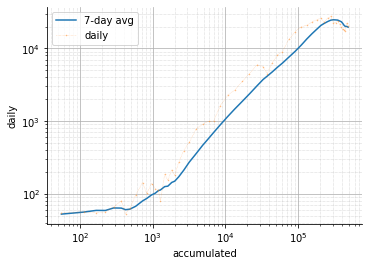

In [8]:
plt_log = visualize(df, axis_scale='log')

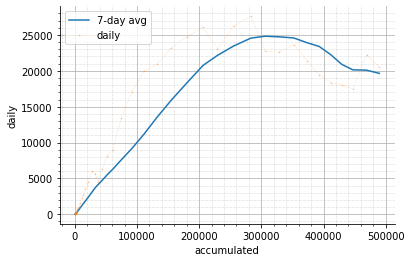

In [9]:
plt_lin = visualize(df, axis_scale='lin')